In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt
import numpy as np

In [2]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)

c:\Users\nithe\Documents\projects\cifar10\.venv\Lib\site-packages\torchvision\datasets\cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


In [3]:
image, label = trainset[0]

print(f"Image Type: {type(image)}") 
print(f"Label Type: {type(label)}") 

print(f"Image Shape: {image.shape}") 

print(f"Label Index: {label}")
print(f"Class Name: {trainset.classes[label]}") 

Image Type: <class 'torch.Tensor'>
Label Type: <class 'int'>
Image Shape: torch.Size([3, 32, 32])
Label Index: 6
Class Name: frog


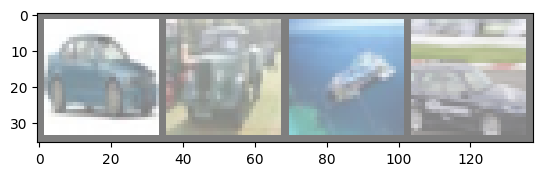

automobile truck ship  automobile


In [4]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()    
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0) 

dataiter = iter(trainloader)
images, labels = next(dataiter) 

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{trainset.classes[labels[j]]:5s}' for j in range(4)))

In [5]:
#defining transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
#spliting ratio
train_ratio = 0.8
validation_ratio = 0.2

#define sizes
data_size = len(trainset)
train_size = int(train_ratio * data_size)
validation_size = data_size - train_size

In [ ]:
#spliting data
train_set, valid_set = random_split(trainset, [train_size, validation_size])
print(len(train_set))   
print(len(valid_set))

40000
10000


In [ ]:
#loading the data
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(valid_set, batch_size=64, shuffle=True)